# XG BOOST

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('Data.csv')

# Display the first few rows to understand the structure
print(data.head())


   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1       

In [2]:
# Separating features and target variable
X = data.drop('Class', axis=1)
y = data['Class']


In [3]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
import xgboost as xgb
# Map the class labels to [0, 1]
y_train_mapped = y_train.map({2: 0, 4: 1})
y_test_mapped = y_test.map({2: 0, 4: 1})

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Train the classifier on the training data with the mapped labels
xgb_clf.fit(X_train, y_train_mapped)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [5]:
# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00      79.0
           4       0.00      0.00      0.00      58.0

    accuracy                           0.00     137.0
   macro avg       0.00      0.00      0.00     137.0
weighted avg       0.00      0.00      0.00     137.0



/Users/joelmendonsa/Desktop/ML Projects/newenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joelmendonsa/Desktop/ML Projects/newenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joelmendonsa/Desktop/ML Projects/newenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

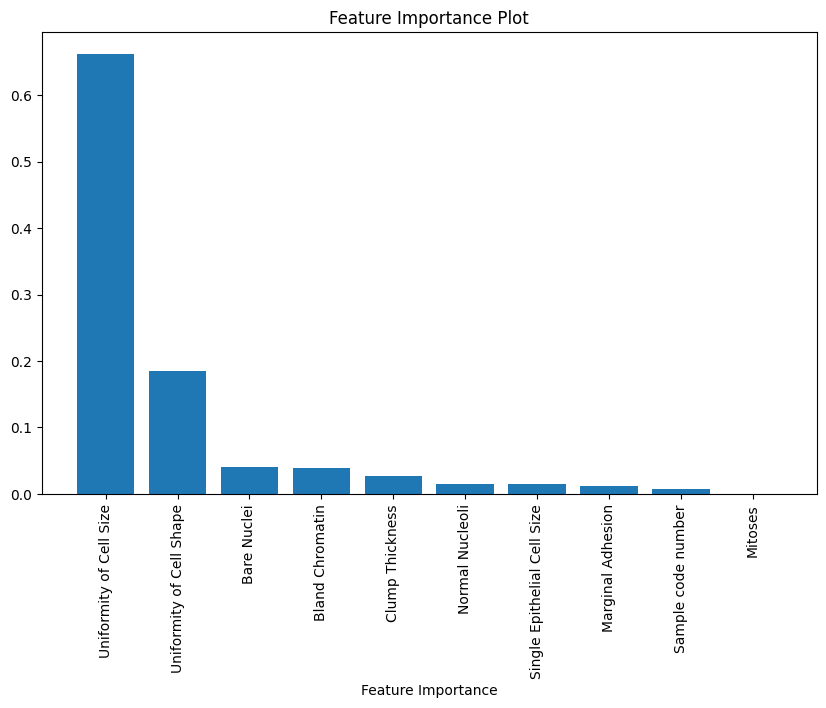

In [6]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming xgb_clf is already trained
# Get feature importance scores
feature_importance = xgb_clf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()
